In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import random
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('/content/drive/My Drive/play')

In [5]:
# CNN
# Αντιστοίχιση των κινήσεων σε αριθμούς
label_encoder = LabelEncoder()
class_mapping = {'scissors': 0, 'rock': 1, 'paper': 2}
label_encoder.fit(list(class_mapping.keys()))

# Συνάρτηση για φόρτωση των εικόνων και ετικετών
def load_images_and_labels(folder_path):
    images = []
    labels = []
    for class_name in class_mapping.keys():
        class_path = os.path.join(folder_path, class_name)
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (30, 30))  # Σμίκρυνση του μεγέθους της εικόνας
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Μετατροπή της εικόνας σε ασπρόμαυρη
            img = img / 255.0  # Κανονικοποίηση στο 0-1
            images.append(img)
            labels.append(class_mapping[class_name])
    return np.array(images), np.array(labels)

# Φόρτωση των εικόνων από τον φάκελο μου στο drive
folder_path = '/content/drive/My Drive/play'
images, labels = load_images_and_labels(folder_path)

# Διαίρεση του dataset σε train και test με το επιθυμητό ποσοστό ανά κλάση
X_train, X_test, y_train, y_test = [], [], [], []

for class_id in class_mapping.values():
    # Επιλογή των εικόνων ανά κλάση
    class_indices = np.where(labels == class_id)[0]

    # Υπολογισμός του ποσοστού για το test set
    test_size = int(0.2 * len(class_indices))

    # Διαίρεση των εικόνων σε train και test
    train_indices, test_indices = train_test_split(class_indices, test_size=test_size, random_state=42)

    # Προσθήκη των εικόνων και των ετικετών στα αντίστοιχα arrays
    X_train.extend(images[train_indices])
    y_train.extend(labels[train_indices])
    X_test.extend(images[test_indices])
    y_test.extend(labels[test_indices])

# Μετατροπή των ετικετών σε δυαδική μορφή (one-hot encoding)
y_train = to_categorical(y_train, num_classes=len(class_mapping))
y_test = to_categorical(y_test, num_classes=len(class_mapping))

# Κατασκευή του μοντέλου CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(30, 30, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(class_mapping), activation='softmax'))

# Σύνθεση του μοντέλου
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Εκπαίδευση του μοντέλου
model.fit(np.array(X_train).reshape(-1, 30, 30, 1), np.array(y_train), epochs=10, validation_data=(np.array(X_test).reshape(-1, 30, 30, 1), np.array(y_test)))


Epoch 1/10
55/55 [==============================] - 3s 32ms/step - loss: 1.0659 - accuracy: 0.4649 - val_loss: 0.9725 - val_accuracy: 0.6339
Epoch 2/10
55/55 [==============================] - 2s 35ms/step - loss: 0.8415 - accuracy: 0.7236 - val_loss: 0.7033 - val_accuracy: 0.7826
Epoch 3/10
55/55 [==============================] - 2s 28ms/step - loss: 0.5842 - accuracy: 0.8167 - val_loss: 0.4809 - val_accuracy: 0.8719
Epoch 4/10
55/55 [==============================] - 1s 21ms/step - loss: 0.4239 - accuracy: 0.8658 - val_loss: 0.3815 - val_accuracy: 0.8924
Epoch 5/10
55/55 [==============================] - 1s 21ms/step - loss: 0.3436 - accuracy: 0.8784 - val_loss: 0.3024 - val_accuracy: 0.9176
Epoch 6/10
55/55 [==============================] - 1s 22ms/step - loss: 0.2840 - accuracy: 0.9109 - val_loss: 0.2611 - val_accuracy: 0.9199
Epoch 7/10
55/55 [==============================] - 1s 22ms/step - loss: 0.2449 - accuracy: 0.9223 - val_loss: 0.2920 - val_accuracy: 0.8947
Epoch 8/10
55

In [27]:
# RANDOM FORREST
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Αντιστοίχιση των κινήσεων σε αριθμούς
class_mapping = {'scissors': 0, 'rock': 1, 'paper': 2}

# Συνάρτηση για φόρτωση των εικόνων και ετικετών
def load_images_and_labels(folder_path):
    images = []
    labels = []
    for class_name in class_mapping.keys():
        class_path = os.path.join(folder_path, class_name)
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (30, 30))  # Σμίκρυνση του μεγέθους της εικόνας
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Μετατροπή της εικόνας σε ασπρόμαυρη
            img = img / 255.0  # Κανονικοποίηση στο 0-1
            images.append(img.flatten())
            labels.append(class_mapping[class_name])
    return np.array(images), np.array(labels)

# Φόρτωση των εικόνων από τον φάκελο με τις εικόνες
folder_path = '/content/drive/My Drive/play'
images, labels = load_images_and_labels(folder_path)

# Διαίρεση του dataset σε train και test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Κατασκευή και εκπαίδευση του Random Forest μοντέλου
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Προβλέψεις στο test set
rf_predictions = rf_model.predict(X_test)

# Υπολογισμός ακρίβειας
accuracy = accuracy_score(y_test, rf_predictions)
print(f"Ακρίβεια του Random Forest μοντέλου: {accuracy}")


Ακρίβεια του Random Forest μοντέλου: 0.9360730593607306


In [36]:
# Δοκιμή των μοντέλων (CNN, RN) σε δικές μου εικόνες
import cv2
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

image_path = '/content/drive/My Drive/play/rock.jpg' #paper.jpg, scissors.jpg

img = cv2.imread(image_path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Αλλαγή των διαστάσεων σε 30x30
resized_img = cv2.resize(gray_img, (30, 30))

# Προεπεξεργασία της εικόνας για τα μοντέλα
img_array_CNN = resized_img.reshape((1, 30, 30, 1))
img_array_CNN = img_array_CNN / 255.0  # Κανονικοποίηση στο [0, 1]

prediction_RN = rf_model.predict([img_array.flatten()])
prediction_CNN = model.predict(img_array_CNN)

# Εμφάνιση της πρόβλεψης
predicted_label_CNN = np.argmax(prediction_CNN)
predicted_label_RN = np.argmax(prediction_RN)
print(f"Προβλεπόμενη κλάση στο CNN: {predicted_label_CNN}")
print(f"Προβλεπόμενη κλάση στο Random Forrest: {predicted_label_RN}")


1/1 [==============================] - 0s 37ms/step
Προβλεπόμενη κλάση στο CNN: 2
Προβλεπόμενη κλάση στο Random Forrest: 0


In [16]:
# Σε αυτό το κομμάτι κώδικα ελέγχουμε κατά πόσο σωστά εκπαιδεύτηκε το μοντέλο του CNN. Παίρνουμε τυχαίες φώτο από το
# test set και ελέγχουμε αν αναγνωρίζονται σωστά.

# Επιλογή 10 τυχαίων δειγμάτων από το test set
random_indices = random.sample(range(len(X_test)), 10)

# Προβλέψεις για τα τυχαία επιλεγμένα δείγματα
predictions = model.predict(np.array(X_test)[random_indices].reshape(-1, 30, 30, 1))

# Εμφάνιση των εικόνων και των προβλέψεων
for i in range(10):
    image = (X_test[random_indices[i]] * 255).astype(np.uint8)  # Επαναφορά των pixel values στο εύρος [0, 255]
    true_label = np.argmax(y_test[random_indices[i]])
    predicted_label = np.argmax(predictions[i])

    print(f"Πραγματική κλάση: {true_label}, Προβλεπόμενη κλάση: {predicted_label}")

    # Εμφάνιση της εικόνας
    cv2_imshow(image)


1/1 [==============================] - 0s 36ms/step
Πραγματική κλάση: 1, Προβλεπόμενη κλάση: 2


Πραγματική κλάση: 0, Προβλεπόμενη κλάση: 0


Πραγματική κλάση: 1, Προβλεπόμενη κλάση: 1


Πραγματική κλάση: 1, Προβλεπόμενη κλάση: 1


Πραγματική κλάση: 1, Προβλεπόμενη κλάση: 1


Πραγματική κλάση: 0, Προβλεπόμενη κλάση: 0


Πραγματική κλάση: 0, Προβλεπόμενη κλάση: 0


Πραγματική κλάση: 0, Προβλεπόμενη κλάση: 0


Πραγματική κλάση: 0, Προβλεπόμενη κλάση: 0


Πραγματική κλάση: 0, Προβλεπόμενη κλάση: 0


Γύρος νούμερο:  1
1/1 [==============================] - 0s 32ms/step
Πραγματικη κλαση του random agent:  0
Ο δικος μου agent πρεπει να επιλεξει:  1
1/1 [==============================] - 0s 36ms/step
Aυτο που προβλεψε ο δικος μου agent :  2
Για να αντιμετωπισει τον random agent επιλεγει :  0
ΙΣΟΠΑΛΙΑ
Γύρος νούμερο:  2
1/1 [==============================] - 0s 26ms/step
Πραγματικη κλαση του random agent:  0
Ο δικος μου agent πρεπει να επιλεξει:  1
1/1 [==============================] - 0s 24ms/step
Aυτο που προβλεψε ο δικος μου agent :  2
Για να αντιμετωπισει τον random agent επιλεγει :  0
ΙΣΟΠΑΛΙΑ
Γύρος νούμερο:  3
1/1 [==============================] - 0s 24ms/step
Πραγματικη κλαση του random agent:  0
Ο δικος μου agent πρεπει να επιλεξει:  1
1/1 [==============================] - 0s 28ms/step
Aυτο που προβλεψε ο δικος μου agent :  0
Για να αντιμετωπισει τον random agent επιλεγει :  1
ΚΕΡΔΙΣΕΣ
Γύρος νούμερο:  4
1/1 [==============================] - 0s 28ms/step
Πραγματικη κλαση του 

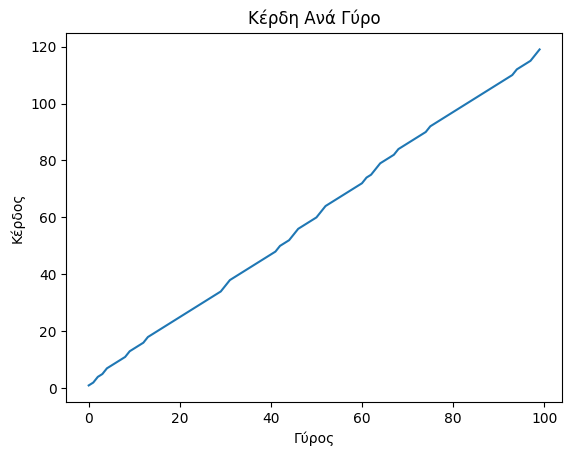

In [21]:
import random
import matplotlib.pyplot as plt

# Παραμέτροι παιχνιδιού
num_rounds = 100  # Πλήθος των γύρων
bet_amount = 1  # Ποσό που ποντάρει ο πράκτορας

# Λίστα για την αποθήκευση των κερδών ανά γύρο
profits_per_round = []

# Μεταβλητή για το συνολικό κέρδος
total_profit = 0

# Η βασική επανάληψη για το παιχνίδι
for round_num in range(1, num_rounds + 1):
    print("Γύρος νούμερο: ", round_num)
    # Επιλογή τυχαίας εικόνας από το test set
    random_index = random.randint(0, len(X_test) - 1)
    predictions = model.predict(np.array(X_test)[random_index].reshape(-1, 30, 30, 1))
    true_label = np.argmax(y_test[random_index])
    print("Πραγματικη κλαση του random agent: ", true_label)
    #predicted_label = np.argmax(predictions)
    #print("Προβλεπόμενη κλαση: ", predicted_label)

    # Με βάση το ποιά πραγματικά εικόνα επιλέχθηκε επιλέγεται η αντίστοιχη κίνηση που θα πρέπει ο δικός μας agent να παίξει.
    if(true_label == 2): # αν ο random agent έχει χαρτί(2) o δικός μας agent πρέπει να επιλέξει ψαλίδι(0)
      must_choose=0
    elif(true_label == 1): # αν ο random agent έχει πέτρα(1) o δικός μας agent πρέπει να επιλέξει χαρτι(2)
      must_choose=2
    else:               # αν ο random agent έχει ψαλίδι(0) o δικός μας agent πρέπει να επιλέξει πέτρα(1)
      must_choose=1
    print("Ο δικος μου agent πρεπει να επιλεξει: ",must_choose)

    random_image = X_test[random_index].reshape(30, 30, 1)  # Προσαρμογή του σχήματος

    # Vertical flip με πιθανότητα 0.5
    if random.random() < 0.5:
        random_image = np.flipud(random_image)

    # Horizontal Flip με πιθανότητα 0.5
    if random.random() < 0.5:
        random_image = np.fliplr(random_image)

    # Προσθήκη τυχαίου θόρυβου
    noise = np.random.normal(loc=0, scale=255 * 0.05, size=random_image.shape)
    random_image = random_image + noise

    # Πρόβλεψη της εικόνας με βάση το μοντέλο που δημιουργήθηκε
    prediction = model.predict(np.array([random_image]))
    print("Aυτο που προβλεψε ο δικος μου agent : ",np.argmax(prediction))

    # Ο δικός μας agent διαβάζει την εικόνα και επιλέγει τη βέλτιστη ενέργεια
    if(np.argmax(prediction) == 2): # αν ο random agent έχει χαρτί(2) o δικός μας agent πρέπει να επιλέξει ψαλίδι(0)
      agent_choice=0
    elif(np.argmax(prediction) == 1):# αν ο random agent έχει πέτρα(1) o δικός μας agent πρέπει να επιλέξει χαρτι(2)
      agent_choice=2
    else:                       # αν ο random agent έχει ψαλίδι(0) o δικός μας agent πρέπει να επιλέξει πέτρα(1)
      agent_choice=1
    print("Για να αντιμετωπισει τον random agent επιλεγει : ", agent_choice)

    # Υπολογισμός κέρδους
    if agent_choice == must_choose: # Αν ο δικός μας agent επέλεξε σωστα, κερδίζει και παίρνει 2 ευρώ
        total_profit += 2
        profits_per_round.append(total_profit)
        print("ΚΕΡΔΙΣΕΣ")
    elif agent_choice == true_label: # Αν ο δικός μας agent επέλεξε το ίδιο με τον random agent πίσω το 1 ευρώ
        total_profit += 1
        profits_per_round.append(total_profit)
        print("ΙΣΟΠΑΛΙΑ")
    else:                     # Αν ο δικός μας agent επέλεξε λάθος και έχασε από τον random agent χάνει 1 ευρώ
        total_profit -= 1
        profits_per_round.append(total_profit)
        print("ΕΧΑΣΕΣ")

# Συνολικό κέρδος
print(f"Συνολικό Κέρδος: {total_profit}")

# Σχεδίαση των κερδών ανά γύρο
plt.plot(profits_per_round)
plt.xlabel('Γύρος')
plt.ylabel('Κέρδος')
plt.title('Κέρδη Ανά Γύρο')
plt.show()


In [ ]:
'''Η εργασία μας αφόρα το παιχνίδι πέτρα-ψαλίδι-χαρτί. Όλη η διαδικασία ξεκινάει αρχικά με το διάβασμα όλου του dataset από το προσωπικό google drive όπου είναι αποθηκευμένες όλες οι εικόνες.
Στην αρχή έγινε αντιστοιχία των τριών κλάσεων που υπάρχουν, scissors, rock και paper, με τρεις αριθμούς, 0,1 και 2 αντίστοιχα. Αυτό το οποίο λάβαμε υπόψιν ήταν να επιλεχθεί 20% από όλες τις κλάσεις στο test set ώστε να υπάρχει αναλογία.
Όσον αφορά την προεπεξεργασία των εικόνων πραγματοποιήθηκε σμίκρυνση του μεγέθους της κάθε εικόνας , στη συνέχεια πραγματοποιήθηκε μετατροπή της εικόνας σε ασπρόμαυρη και έγινε και κανονικοποίηση μεταξύ του 0 και 1.
Έπειτα έγινε η εκπαίδευση δύο μοντέλων για την αναγνώριση της εικόνας από τον agent μας.  Χρησιμοποιήθηκαν Convolution Neural Networks (CNN) και Random Forrest. Βέβαια στο CNN δόθηκε περισσότερη βάση δίοτι πρώτα από όλα
πέτυχε accuracy 94% ενώ το Random Forrest 93%(μίκρη διαφορά) και επίσης είναι μία τεχνική πολύ αποτελεσματική όταν πρόκειται για πολύπλοκα προβλήματα.
Η ικανότητα των CNNs να μαθαίνουν αυτόματα τα χαρακτηρηστικά των εικόνων, όπως γωνίες, ακμές και σχήματα μας έκαναν να επιλέξουμε αυτή τη τεχνική για την αναγνώριση των εικόνων.

Η δομή του CNN είναι η εξής:
-	Conv2D: Έχει 32 φίλτρα μεγέθους (3x3) που κινούνται στην είσοδο της εικόνας με βήμα 1.
Η συνάρτηση ενεργοποίησης είναι η RELU.
Η είσοδος του στρώματος είναι εικόνες με διαστάσεις 30x30 pixels και έχουν 1 κανάλι.
-	MaxPooling2D: Είναι το στρώμα μείωσης των διαστάσεων για τη μείωση της πολυπλοκότητας του μοντέλου. Χρησιμοποιεί παράθυρο μεγέθους 2x2 και διαστάσεων βήματος 2.
-	Flatten: Το στρώμα αυτό χρησιμοποιείται για να μετατραπούν οι πίνακες δεδομένων σε έναν επίπεδο πίνακα για την είσοδο στα επόμενα πλήρως συνδεδεμένα επίπεδα.
-	Dense: Ένα πλήρως συνδεδεμένο επίπεδο με 128 νευρώνες, χρησιμοποιώντας τη συνάρτηση ενεργοποίησης ReLU.
-	Dense – Output Layrer: Αυτό το στρώμα έχει όσους νευρώνες είναι και ο αριθμός των κλάσεων που πρέπει να προβλέψουμε. Η συνάρτηση ενεργοποίησης που χρησιμοποιήθηκε είναι η softmax.
Με την εκπαίδευση του CNN παρατηρήθηκε ότι το μοντέλο έφτασες ποσοστά ακρίβειας (accuracy) κόντα στο 95%.

Βασική λειτουργία παιχνιδιού:
Υπάρχει μία βασική for-loop για την εκτέλεση του παιχνιδιόυ. Στην αρχή επιλέγεται τυχαία μια εικόνα από το test set. Στη συνέχεια εμφανίζεται η πραγματική κλάση της εικόνας που επιλέχθηκε με τυχαίο τρόπο.
Έπειτα ορίζεται μία μεταβλητή (must_choose) η οποία δηλώνει το τι θα πρέπει να επιλέξει ο δικός μας agent για να νικήσει τον random agent.
Επισής πραγματοποίουνται και τα βήματα για vertical flip με πιθανότητα 0.5 , horizontal flip με πιθανότητα 0.5 και γίνεται προσθήκη τυχαίου θορύβου.
Στη συνέχεια ο δικός μας agent με βάση το μοντέλο του CNN που εκπαιδεύτηκε προβλέπει την εικόνα του random agent ώστε να επιλέξει την κίνηση του.
Έπειτα συγκρίνεται η κίνηση του δικού μας agent με τη κίνηση την οποία θα έπρεπε να κάνει για να νικήσει τον random agent και στη συνέχεια κάνουμε plot τα κέρδη κατά τη διάρκεια όλου του παιχνιδιού.
Αυτό που παρατηρείται και στο plot των κερδών είναι ότι συνεχώς αυξάνονται τα κέρδη, άρα σημαίνει ότι ο δικός μας agent καταφέρνει να νικάει τον random agent.
'''